In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

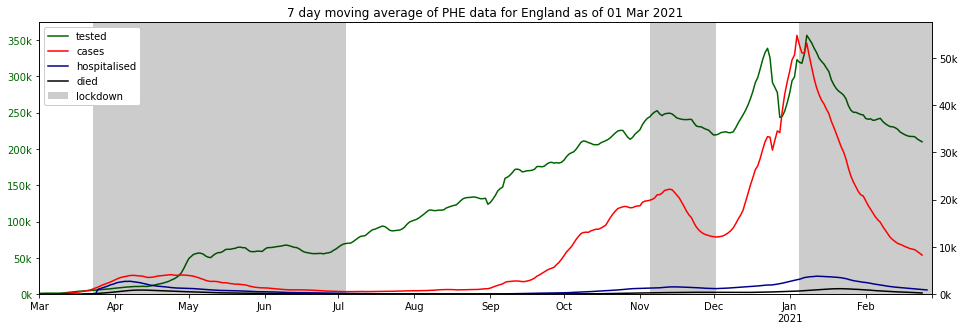

In [2]:
plot_summary(earliest_date='2020-03-01')

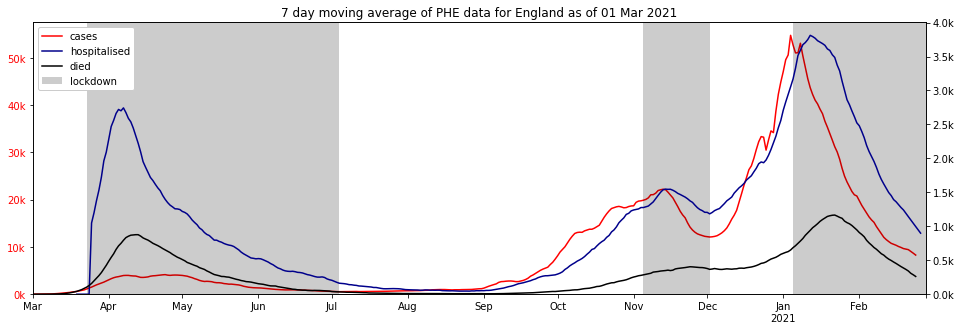

In [3]:
plot_summary(earliest_date='2020-03-01', left_series=(s.new_cases_sum,), 
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,599935.0,17212804.0,16612869.0,56286961,1.065851,29.514596,69.419553
1,Northern Ireland,N92000002,33197.0,525400.0,492203.0,1893667,1.753054,25.992057,72.254890
2,Scotland,S92000003,78865.0,1611578.0,1532713.0,5463300,1.443541,28.054711,70.501748
3,Wales,W92000004,103819.0,925669.0,821850.0,3152879,3.292832,26.066652,70.640516


'partial: 20,275,451'

'full: 815,816'

66796807

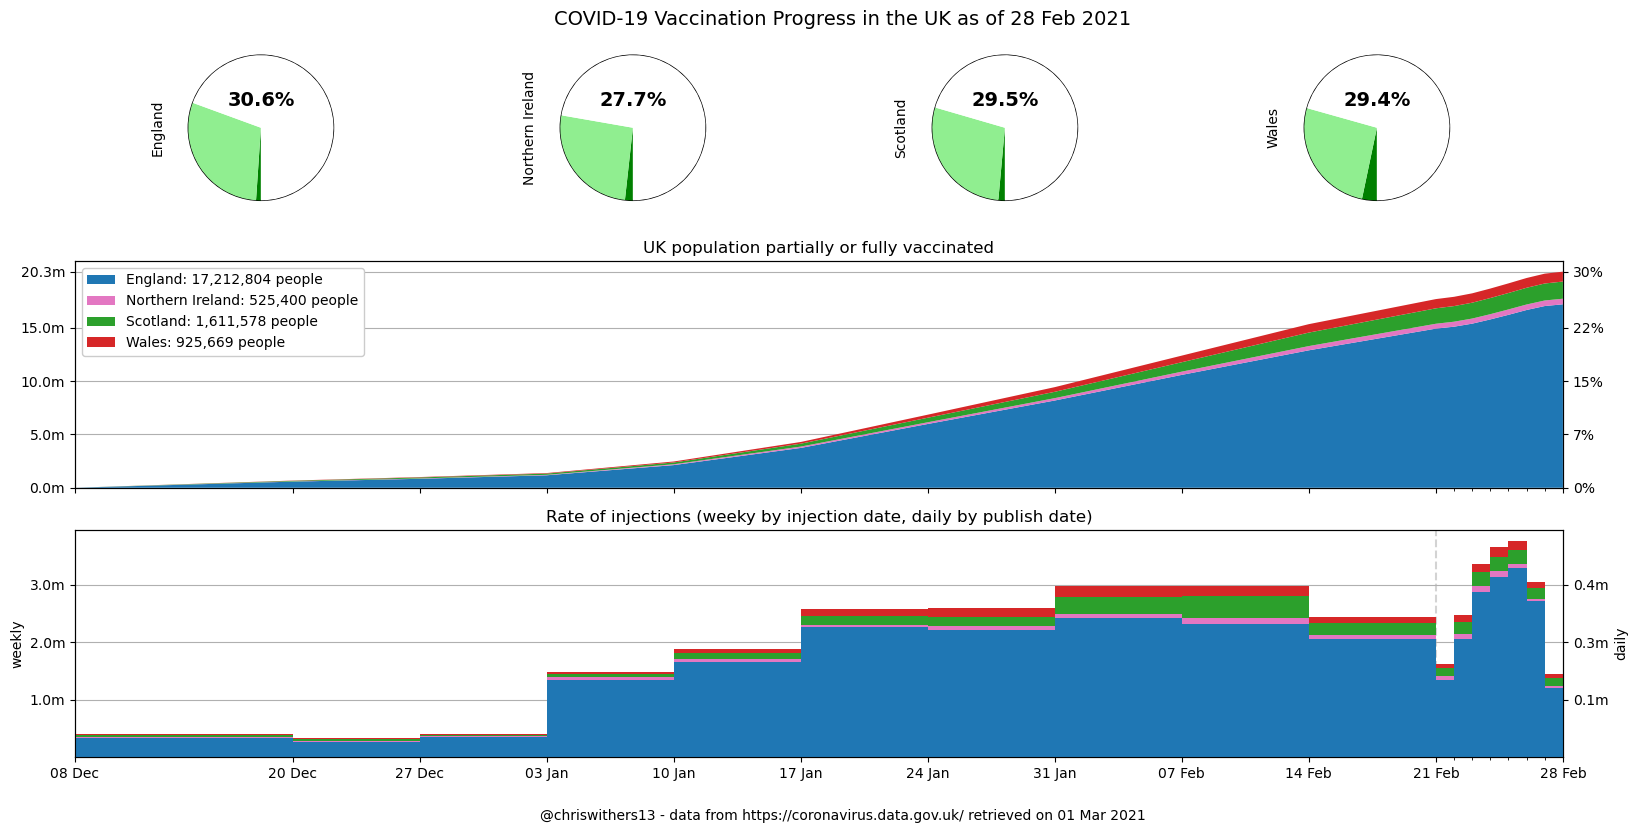

In [4]:
results = vaccination_dashboard()
display(results, f"partial: {results['any'].sum():,.0f}", f"full: {results['full'].sum():,.0f}", results['population'].sum())

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,28 Feb 21,"+161,559","+9,388","+9,388","+17,212,804","+599,935","+599,935"
Northern Ireland,28 Feb 21,"+4,404",+532,+532,"+525,400","+33,197","+33,197"
Scotland,28 Feb 21,"+17,883","+2,353","+2,353","+1,611,578","+78,865","+78,865"
Wales,28 Feb 21,"+2,054","+7,411","+7,411","+925,669","+103,819","+103,819"


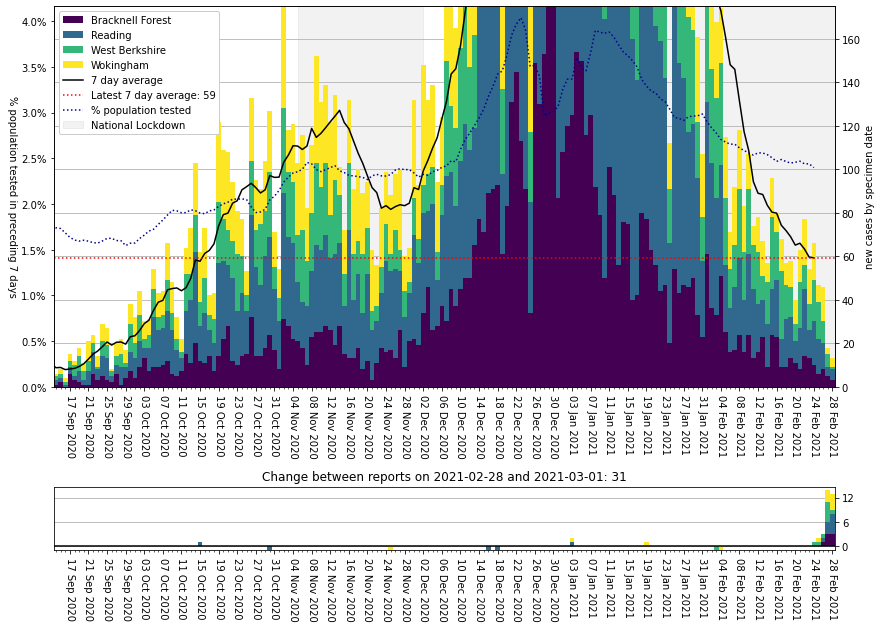

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=175)

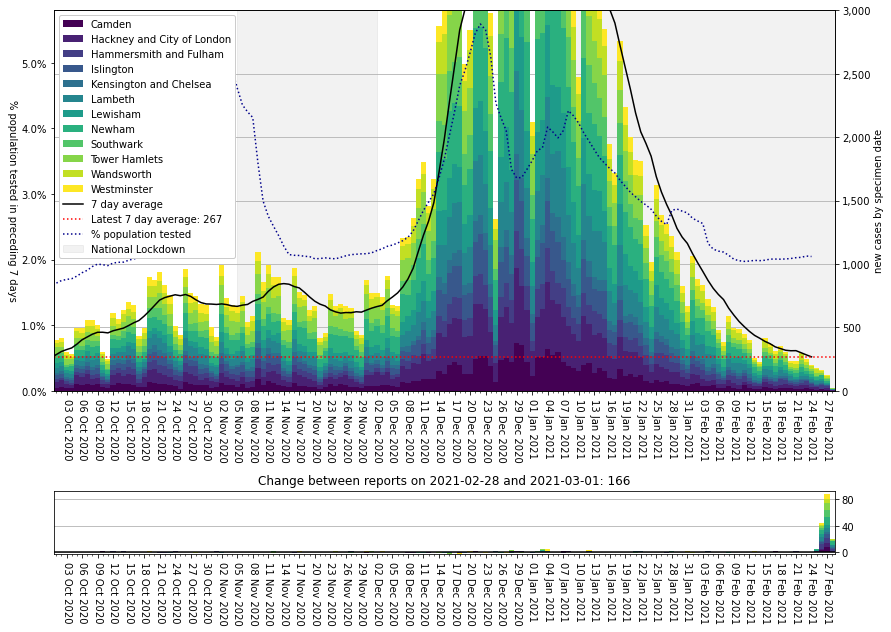

In [7]:
plot_areas(for_date, areas=london_areas, ylim=3_000)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000134,North West Leicestershire,189.169104,196.0,2021-02-28
E06000016,Leicester,174.183567,617.0,2021-02-28
E07000150,Corby,171.702346,124.0,2021-02-28
E07000170,Ashfield,163.385919,209.0,2021-02-28
E07000010,Fenland,157.093765,160.0,2021-02-28
E06000031,Peterborough,156.235322,316.0,2021-02-28
E07000174,Mansfield,155.516727,170.0,2021-02-28
E07000140,South Holland,152.601059,145.0,2021-02-28
E07000236,Redditch,148.954387,127.0,2021-02-28


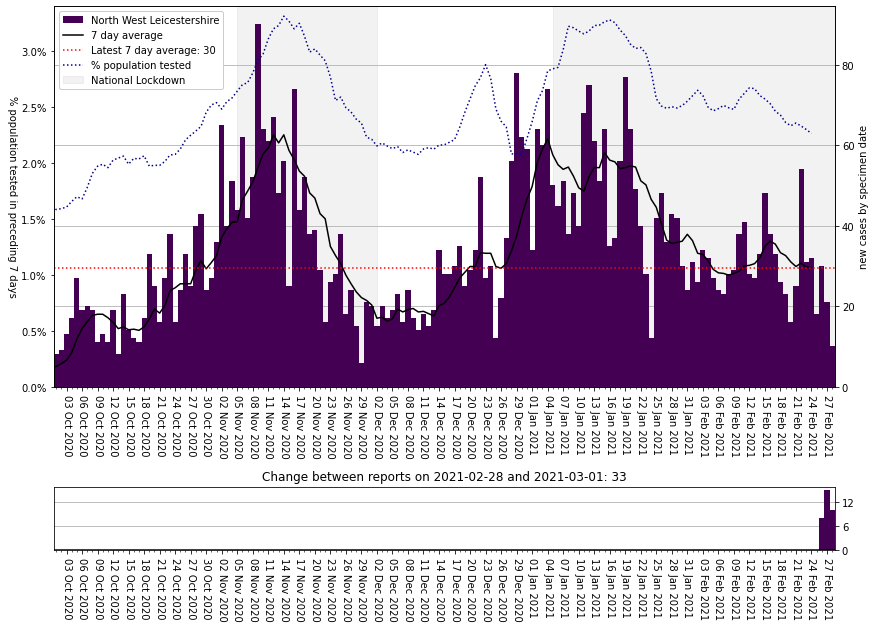

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,102.293189,1168.0,2021-02-28
E08000035,Leeds,114.607906,909.0,2021-02-28
E08000032,Bradford,137.279168,741.0,2021-02-28
S12000049,Glasgow City,102.982057,652.0,2021-02-28
E06000016,Leicester,174.183567,617.0,2021-02-28
E08000003,Manchester,103.281494,571.0,2021-02-28
E08000019,Sheffield,88.569264,518.0,2021-02-28
E08000034,Kirklees,113.009252,497.0,2021-02-28
E06000047,County Durham,89.984041,477.0,2021-02-28


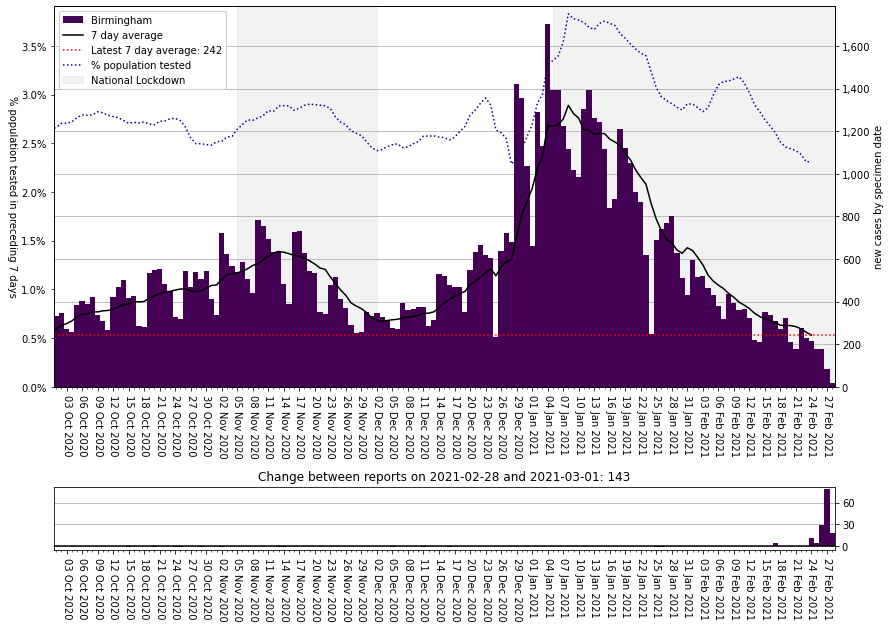

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [19]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.3
phe_max = 0.30

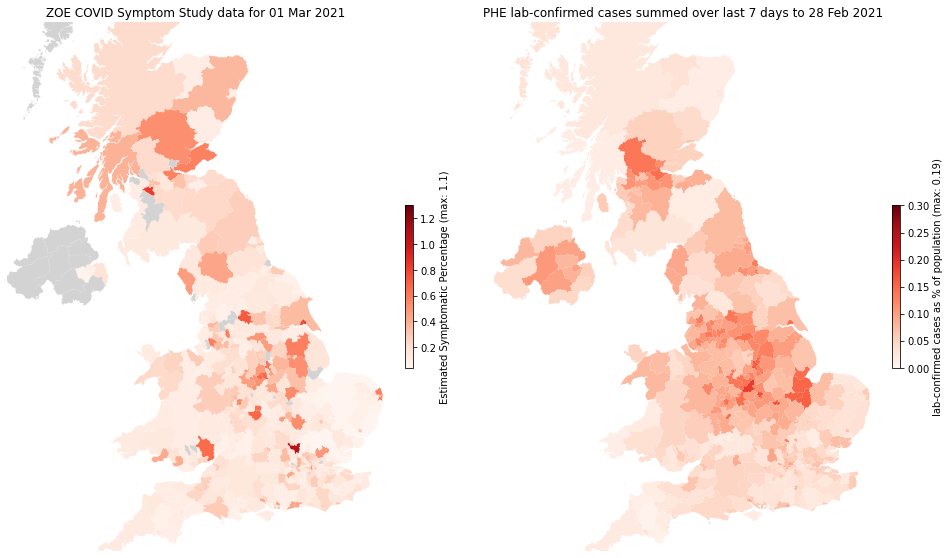

In [20]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [21]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

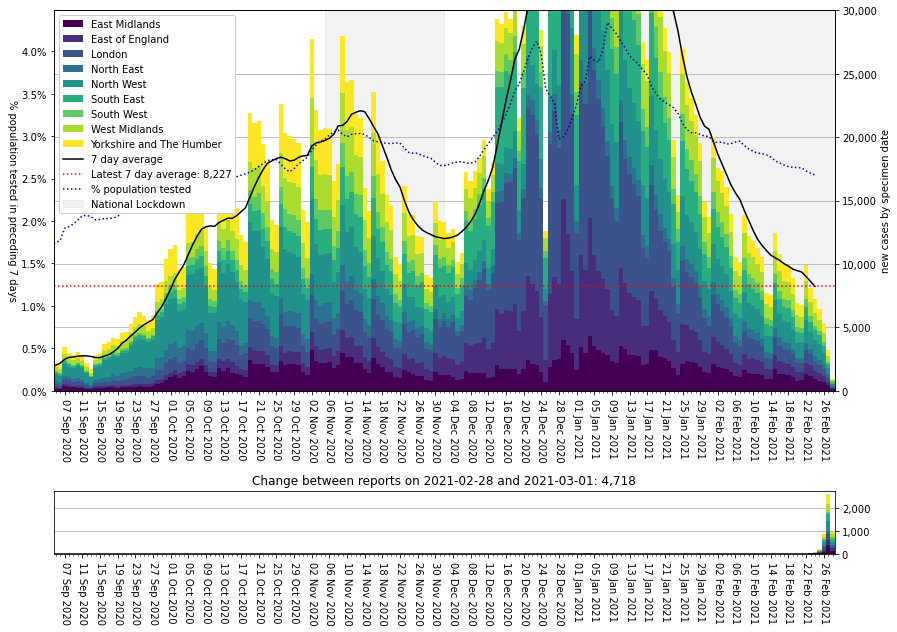

In [16]:
plot_areas(for_date, area_type=region, ylim=30_000, earliest='2020-09-05')

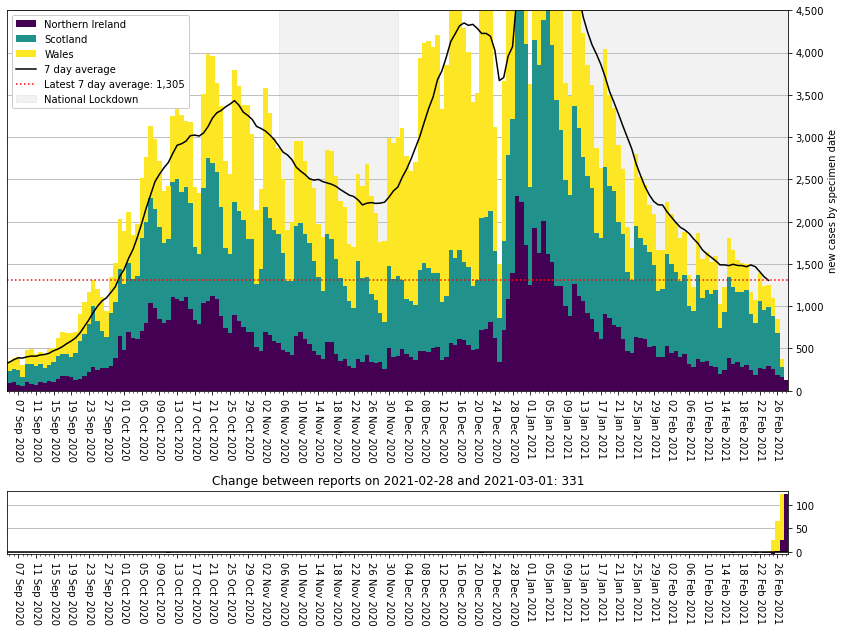

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=4_500, diff_ylims=None, earliest='2020-09-05')